<a href="https://colab.research.google.com/github/plaban1981/Mitra_AI/blob/main/Copy_of_lecture_fake_news_identifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture: Identifying real and fake news

This is part of a ML course from *Invento Robotics*. We will cover the following:
1. Pandas
2. Scikit-learn
3. Gradio

Let's create a simple Machine Learning app that detects fake news with some accuracy and deploy it to the world.

Data from: https://www.kaggle.com/datasets/balajiviswanathan83/fake-news-dataset










In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110685 sha256=96c63c72a8c468b5bccec2ce719bfae5e1975e97b4a24867ce99d0ffbba29fa8
  Stored in directory: /root/.cache/pip/wheels/43/4b/fb/736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plabannayak","key":"e07977afd437047e0247b86b331025b8"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [4]:
!kaggle datasets download -d balajiviswanathan83/fake-news-dataset

  0% 0.00/1.86M [00:00<?, ?B/s]
100% 1.86M/1.86M [00:00<00:00, 138MB/s]


In [5]:
import os
os.mkdir('Data')

In [6]:
!unzip "/content/fake-news-dataset.zip" -d Data

Archive:  /content/fake-news-dataset.zip
  inflating: Data/true_fake_news.csv  


**Step 1: Importing the data from your local computer.**
Refer to earlier lectures if you have questions on this part.

In [7]:
import pandas as pd
df = pd.read_csv("/content/Data/true_fake_news.csv")
print("Rows and columns", df.shape[0], df.shape[1])
df.head()

Rows and columns 2000 6


,Unnamed: 0,title,text,subject,date,Is Fake
0,5820,NH Car Dealer Gives Away Free AR-15s With Car...,Mike Hagan has a used car dealership and repai...,News,"June 18, 2016",1
1,22179,EP #16: Patrick Henningsen LIVE – ‘Official Wa...,Join Patrick every Wednesday at Independent Ta...,US_News,"March 9, 2017",1
2,18482,WOW! ALEX JONES Releases Secretly Recorded Int...,Alex Jones scooped NBC and Megyn Kelly with a ...,left-news,"Jun 15, 2017",1
3,13991,SAY GOOD BYE TO LONDON: Radical Muslim WINS Lo...,Has the entire world gone mad with political c...,politics,"May 3, 2016",1
4,16629,INFAMOUS ROMANIAN HACKER Tells FOX News Host H...,"Of course, America s favorite criminal candida...",Government News,"May 4, 2016",1


**Step 2: Let us setup the input and output data.**
In Supervised Machine Learning problems, we separate an input from the output. Input is what you supply and output is what the machine learns to return. During the training phase you supply both input and output data.

Our problem becomes -- given a text input can you predict if the news is fake or real?

In [8]:
df["News"] = df["title"] + " " + df['text']
df.head()

,Unnamed: 0,title,text,subject,date,Is Fake,News
0,5820,NH Car Dealer Gives Away Free AR-15s With Car...,Mike Hagan has a used car dealership and repai...,News,"June 18, 2016",1,NH Car Dealer Gives Away Free AR-15s With Car...
1,22179,EP #16: Patrick Henningsen LIVE – ‘Official Wa...,Join Patrick every Wednesday at Independent Ta...,US_News,"March 9, 2017",1,EP #16: Patrick Henningsen LIVE – ‘Official Wa...
2,18482,WOW! ALEX JONES Releases Secretly Recorded Int...,Alex Jones scooped NBC and Megyn Kelly with a ...,left-news,"Jun 15, 2017",1,WOW! ALEX JONES Releases Secretly Recorded Int...
3,13991,SAY GOOD BYE TO LONDON: Radical Muslim WINS Lo...,Has the entire world gone mad with political c...,politics,"May 3, 2016",1,SAY GOOD BYE TO LONDON: Radical Muslim WINS Lo...
4,16629,INFAMOUS ROMANIAN HACKER Tells FOX News Host H...,"Of course, America s favorite criminal candida...",Government News,"May 4, 2016",1,INFAMOUS ROMANIAN HACKER Tells FOX News Host H...


In [9]:
y = df["Is Fake"] # This is a array created from one column that we are looking to predict in the future.
#X = df["text"] # We will just use the text for this exercise
X = df["News"]

**Step 3: Let us split the data into 2 groups -- training and testing.**
Don't worry about this too much. You will fully grasp this concept by end of the program. For now, just assume that we will create 2 more arrays.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)


<Axes: xlabel='Is Fake', ylabel='count'>

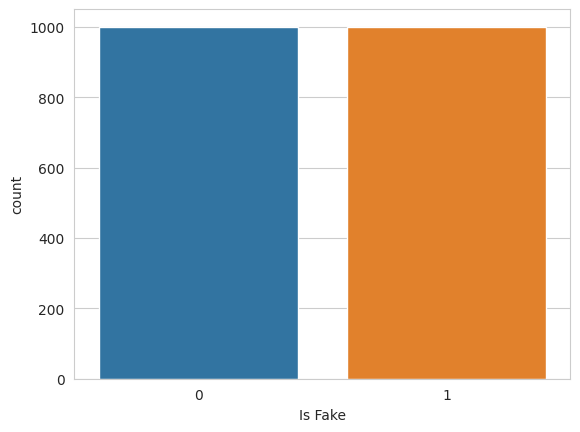

In [14]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(data=df,x=df["Is Fake"])


**Step 4: We need some processing of the data**
Let's make it a little easier for the machine to understand this array.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english', max_df=0.7)

X_vec_train=tfidf.fit_transform(X_train)
X_vec_test=tfidf.transform(X_test)
print(X_vec_train)

  (0, 12459)	0.0339924157633188
  (0, 10762)	0.03520652586074602
  (0, 15652)	0.057233590600549764
  (0, 27002)	0.0339924157633188
  (0, 12457)	0.02696253590700259
  (0, 9685)	0.027985091624857367
  (0, 14401)	0.027200041311680696
  (0, 6797)	0.03165968637573335
  (0, 27173)	0.043758738663819886
  (0, 26411)	0.036762447903342425
  (0, 10253)	0.037689108685635186
  (0, 18781)	0.033596540946613976
  (0, 9721)	0.05597025466676722
  (0, 14516)	0.03591375378389577
  (0, 19447)	0.14782585562198258
  (0, 11751)	0.04812048272771388
  (0, 13779)	0.020823178869682202
  (0, 17387)	0.05336785294634875
  (0, 9691)	0.04140074389637218
  (0, 6323)	0.061326158339570974
  (0, 14086)	0.12985252374845876
  (0, 24974)	0.07757104241632447
  (0, 24820)	0.05168169020659012
  (0, 20139)	0.041261520806533176
  (0, 10760)	0.03740206998777974
  :	:
  (1599, 5109)	0.09709802044182847
  (1599, 16273)	0.12042497539359553
  (1599, 18666)	0.14872959347002906
  (1599, 17358)	0.12502791563679874
  (1599, 6200)	0.162108

In [16]:
temp_df = pd.DataFrame(X_vec_train.toarray(), columns=tfidf.get_feature_names_out())
temp_df

,00,000,0000,000270,00106,004,005,005380,00am,01,...,zuarth,zuckerberg,zuckermann,zuhdi,zukunfteuropaa,zulkarnain,zuma,zurchin,zurich,zwickau
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.024862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1596,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1597,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Step 5: Now comes the cool ML part**
We will use a ML algorithm called the Passive Aggressive Classifier (we won't get into the details now, but we will talk about it in the following lectures) to train a machine.

In [17]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_vec_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

That is all baby. We have trained our simple ML algorithm. Is it magic or what? We will soon see.

**Step 6: Testing the accuracy of the model**
We have taken 400 rows of the data that we kept separately for testing. We will use that. The accuracy is a number between 0 to 1.

In [18]:
accuracy = model.score(X_vec_test, y_test)
print("The test accuracy is",accuracy)

The test accuracy is 0.975


<Axes: >

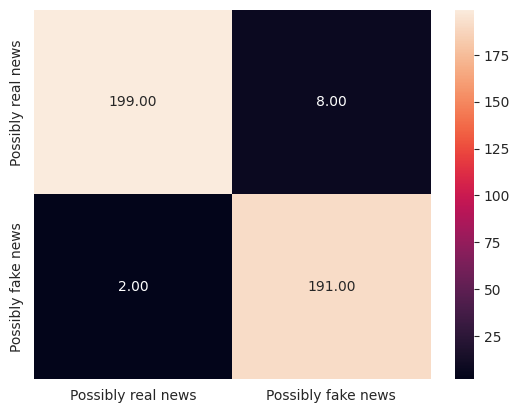

In [19]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_vec_test)
cf = confusion_matrix(pred,y_test)
sns.heatmap(cf, annot=True,fmt=".2f",xticklabels=["Possibly real news","Possibly fake news"],yticklabels=["Possibly real news","Possibly fake news"])

In [20]:
#We will create a new function for prediction.
def predict_news(news_text):
  prediction = model.predict(tfidf.transform([news_text]))
  if prediction[0] == 1:
    return "Possibly fake news"
  else:
    return "Possibly real news"


text = 'NH Car Dealer Gives Away Free AR-15s With Car Purchases – Gun Nuts Sickeningly Rejoice'
print(predict_news(text))

text = 'Alabama attorney general named to Jeff Sessions Senate seat'
print(predict_news(text))

Possibly fake news
Possibly real news


In [21]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.8 MB/s eta 0:

In [22]:
import gradio
gradio.Interface(predict_news, "text", "text").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b3051b3d0d8a9434fd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


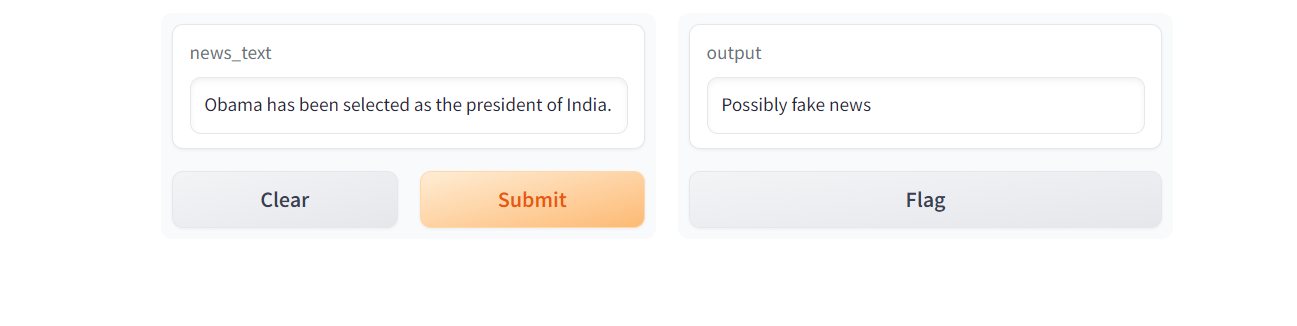

In [ ]:
#Optional: Save the model now: If you want to use this later
import pickle

with open('tfidf.pickle', 'wb') as f:
    pickle.dump(tfidf, f, pickle.HIGHEST_PROTOCOL)

with open('model.pkl','wb') as f:
    pickle.dump(model,f)